In [7]:
from collections import Counter
from urllib.parse import urlparse

import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from config import SCRAPED_DIR

In [2]:
files = list(SCRAPED_DIR.rglob("*.jsonl"))

In [23]:
domains = Counter()
tweets_with_links = 0
tweets_total = 0
restricted_domains = {
    "twitter.com",  # Quoted tweets add a link to content
    "support.twitter.com", # Banned twitter accounts
    "m.in",  # między innymi
}


for f in tqdm(files):
    df = pd.read_json(f, lines=True)
    tweets_total += len(df)

    for _, data in df.iterrows():
        if links := data["links"]:
            add_count = False

            for link in links:
                parsed = urlparse(link)
                domain = parsed.netloc.lower().removeprefix("www.")
                
                if domain not in restricted_domains:
                    domains[domain] += 1
                    add_count = True

            if add_count:
                tweets_with_links += 1


100%|██████████| 1231/1231 [00:37<00:00, 32.83it/s]


Tweets with links: 56534
Total: 1231000
Percentage: 4.592526401299756 %


Text(0, 0.5, 'Count')

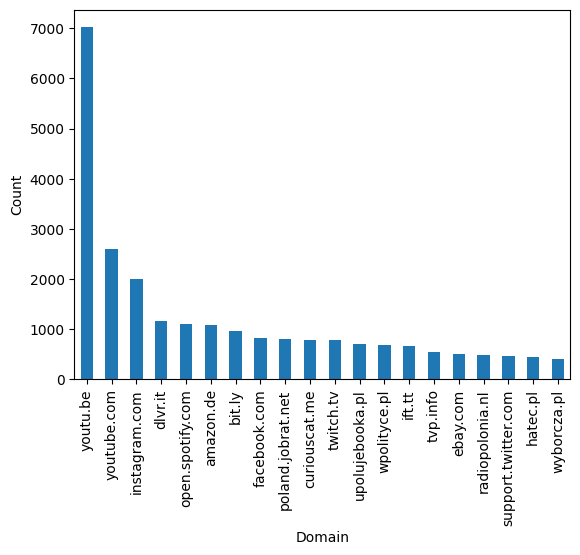

In [30]:
print("Tweets with links:",tweets_with_links)
print("Total:", tweets_total)
print("Percentage:", tweets_with_links / tweets_total * 100, "%")

pd.DataFrame(domains.most_common(20), columns=["Domain", "Count"]).plot.bar(x="Domain", y="Count")
plt.legend().remove()
plt.ylabel("Count")

In [4]:

print(domains)

1231000
56918
Counter({'youtu.be': 7020, 'youtube.com': 2597, 'instagram.com': 2001, 'dlvr.it': 1154, 'open.spotify.com': 1093, 'amazon.de': 1076, 'bit.ly': 966, 'facebook.com': 823, 'poland.jobrat.net': 793, 'curiouscat.me': 791, 'twitch.tv': 778, 'upolujebooka.pl': 697, 'wpolityce.pl': 680, 'ift.tt': 671, 'tvp.info': 534, 'ebay.com': 508, 'radiopolonia.nl': 487, 'support.twitter.com': 466, 'm.in': 449, 'hatec.pl': 447, 'wyborcza.pl': 402, 'curiouscat.qa': 394, 'goodreads.com': 387, 'wiadomosci.onet.pl': 373, 'niezalezna.pl': 368, 'tysol.pl': 359, 'ratujemyzwierzaki.pl': 342, 'vm.tiktok.com': 305, 'tvn24.pl': 270, 'mobo.blog': 260, 'wiadomosci.wp.pl': 257, 'rp.pl': 252, 'soundcloud.com': 242, 'radioo.pl': 233, 'cyberfeed.pl': 226, 'modeledo.pl': 225, 'affinitweet.com': 218, 'siepomaga.pl': 205, 'onet.pl': 203, 'amazon.com': 202, 'defence24.pl': 194, 'idealdesign.pl': 194, 'msn.com': 192, 'tinyurl.com': 188, 'euroeden.pl': 184, 'dorzeczy.pl': 177, 'polskieradio24.pl': 174, 'tmblr.co': 